71996
          Wind Speeds (m/s)  Wind Direction (Degrees)
Time (s)                                             
0                    22.243                       350
1                    22.354                       349
2                    22.337                       347
3                    22.397                       344
4                    22.450                       341
5                    22.477                       339
6                    22.604                       339
7                    22.069                       338
8                    22.040                       337
9                    22.128                       336
10                   21.845                       334
11                   21.713                       332
12                   22.287                       331
13                   22.080                       330
14                   21.470                       328
15                   21.756                       326
16                   2

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


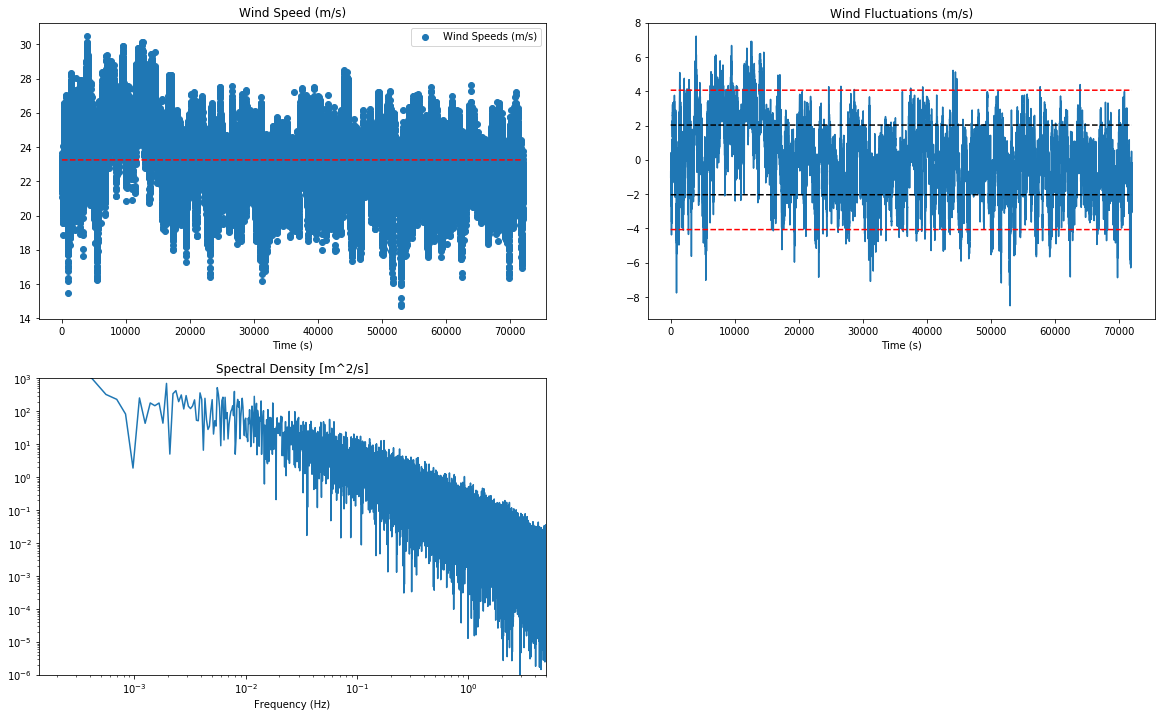

In [298]:
#Micrometeorology project #3: Spectral Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import scipy.fftpack
import os
from numpy.linalg import norm
import random as rd

fs = 10  #sampling frequency
wind_data = open('C:/Users/User/Documents/Wind Energy/Intro to MicroMeterology/Assignment 3/sonic1u10Hz.dat','r')
wind_data.readline()
wind_speeds = []
for speed in wind_data:
    speed = speed.replace('\n','')
    speed = float(speed)
    #eliminate any anomalies in the data set
    if speed < 32:
        wind_speeds.append(speed)
#print(wind_speeds)
ws_index = 'Wind Speeds (m/s)'
length = len(wind_speeds)
print(length)

#must use the list function because the range() function will not be usable as a type outside of a loop
time = list(range(length))

#easiest to turn a dictionary type into a DataFrame
dict_wind = {'Time (s)': time, 'Wind Speeds (m/s)': wind_speeds}
wind_series = pd.DataFrame(dict_wind)

#create random wind directions for the time series

def wind_direction(start_dir,alpha):
    wind_dir = []
    wind_dir.append(start_dir)
    hold_dir = start_dir
    for i in range(1,length):
        hold_dir = int(hold_dir * alpha + np.random.normal(1.0,0.8))
        #this is to ensure that the degrees created are within the acceptable range
        if hold_dir > 359: 
            hold_dir = 359
        elif hold_dir < 0:
            hold_dir = 1
        wind_dir.append(hold_dir)
    return wind_dir

wind_d = wind_direction(350,0.994)
wind_series['Wind Direction (Degrees)'] = wind_d

#use the time as an index for the wind speeds
wind_series = wind_series.set_index('Time (s)')
print(wind_series)

#stats but you can also use .describe()
wind_av = np.mean(wind_speeds)
wind_std= np.std(wind_speeds)
print(wind_std)
print(wind_av)
print(np.sqrt(np.mean((wind_speeds-wind_av)**2)))

#spectral analysis
spec = np.power(abs(scipy.fftpack.fft(wind_series[ws_index]-wind_av)),2)/(length*fs)
#Nyquist frequency (half the sampling rate)
spec_lim = int(len(spec)/2 + 1)
spec = spec[:spec_lim]
print(spec_lim)

#figure making
fig_1 = mpl.figure(figsize=(20,12))
ws_1 = fig_1.add_subplot(221,frameon = True)
ws_1.scatter(range(length),wind_series[ws_index])
ws_1.plot(range(length),np.ones(length)*wind_av,'r--')
ws_1.set_title('Wind Speed (m/s)')
ws_1.set_xlabel('Time (s)')
ws_1.legend()

ws_2 = fig_1.add_subplot(222)
ws_2.plot(range(length),wind_series[ws_index] - wind_av)
ws_2.plot(range(length),np.ones(length)*wind_std,'k--')
ws_2.plot(range(length),np.ones(length)*2*wind_std,'r--')

ws_2.plot(range(length),np.ones(length)*-wind_std,'k--')
ws_2.plot(range(length),np.ones(length)*2*-wind_std,'r--')
ws_2.set_title('Wind Fluctuations (m/s)')
ws_2.set_xlabel('Time (s)')

fft_1 = fig_1.add_subplot(223)
fft_1.loglog(np.linspace(0,fs/2,len(spec)),2*spec)
fft_1.set_xlim(0,fs/2)
fft_1.set_ylim(10**(-6),10**3)
fft_1.set_title('Spectral Density [m^2/s]')
fft_1.set_xlabel('Frequency (Hz)')
mpl.show()

fig_1.savefig('Wind_Series.png')

In [132]:
rand_arr = [3,2,1]
print(np.power(rand_arr,2))

[9 4 1]


In [284]:
wind_series[15500:15600]

,Wind Speeds (m/s),Wind Direction (Degrees)
Time (s),,
15500,24.200,100
15501,24.538,101
15502,24.556,101
15503,24.467,101
15504,24.346,101
15505,24.159,101
15506,24.442,101
15507,24.397,101
15508,24.492,101


In [144]:
xt = list(range(5))
print(xt)

[0, 1, 2, 3, 4]


In [158]:
norm(rand_arr)

3.7416573867739413

In [229]:
int(103.45)

103

In [184]:
print(np.shape([time]))
print(np.shape([wind_speeds]))

(1, 71996)
(1, 71996)


In [197]:
import random as rd


51
65
84
51
38


In [278]:
np.random.normal(0,1.5)

-0.3686603922799947

In [306]:
x = 'The end is Near'
y = list(x)
print(y)


SyntaxError: invalid syntax (<ipython-input-306-ee6ee55c0dfb>, line 2)

In [308]:
np.floor(3.5)

3.0

In [312]:
x = [1,2]
x.reverse()
print(x)

[2, 1]


In [314]:
for i in range(3,0,-1):
    print('Fuck')

Fuck
Fuck
Fuck


In [317]:

x = np.linspace(0,2*np.pi,10)
np.sin(x)

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

In [319]:
p = [True,False]
print(p)

[True, False]


In [322]:
p = {3}
print(list(p))

[3]


In [325]:
import array as arr
arr.array(2,2)

TypeError: array() argument 1 must be a unicode character, not int

In [328]:
np.zeros((3,3),dtype = int)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])